# TITANIC WORKSHOW

### Import libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [113]:
data_train = pd.read_csv('train.csv')

In [114]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check null values

In [116]:
null_values = data_train.isnull().sum() / len(data_train) 
null_values[null_values>0]

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

### Age imputation

<AxesSubplot:>

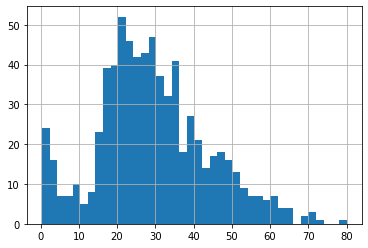

In [117]:
data_train['Age'].hist(bins=40)

In [118]:
nullage_notsurvived = data_train[(data_train['Age'].isnull()) & (data_train['Survived']==False)].index
nullage_notsurvived

Int64Index([  5,  26,  29,  42,  45,  46,  48,  64,  76,  77,
            ...
            825, 826, 832, 837, 846, 859, 863, 868, 878, 888],
           dtype='int64', length=125)

In [119]:
nullage_survived = data_train[(data_train['Age'].isnull()) & (data_train['Survived']==True)].index
nullage_survived

Int64Index([ 17,  19,  28,  31,  32,  36,  47,  55,  65,  82, 107, 109, 128,
            166, 186, 198, 241, 256, 274, 298, 300, 301, 303, 306, 330, 334,
            347, 358, 359, 367, 368, 375, 431, 444, 457, 507, 533, 547, 573,
            596, 612, 643, 653, 669, 692, 697, 709, 727, 740, 828, 839, 849],
           dtype='int64')

In [120]:
data_train.loc[nullage_notsurvived,'Age'] = data_train['Age'].mean()
data_train.loc[nullage_survived,'Age'] = data_train['Age'].median()

In [121]:
data_train['Age'] = data_train['Age'].astype(int) 

### Cabin 

### Embarked

In [122]:
data_train['Embarked'].mode()[0]
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0],inplace=True)

'S'

### Survived

In [123]:
y_dist = data_train['Survived'].value_counts()

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

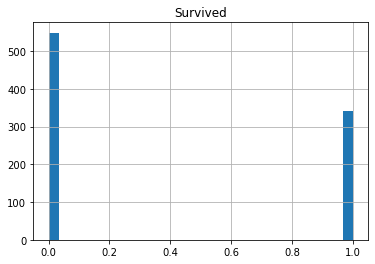

In [124]:
data_train.hist(column='Survived',bins=30)

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Y distibution')

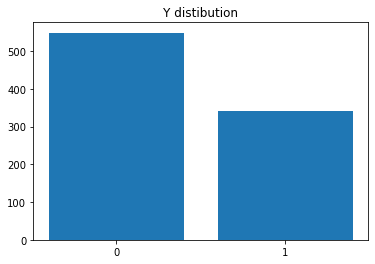

In [125]:
plt.bar(y_dist.index.values, y_dist.values,tick_label=y_dist.index.values)
plt.title('Y distibution')

## Drop Columns

In [126]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
data_train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1, inplace=True)

In [128]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


## Categorical -> Numeric

In [129]:
# def map_sex(value):
#     if value=='male':
#         return 1
#     else:
#         return 0
# data_train['Sex'].apply(map_sex)

In [130]:
# data_train['Sex'].apply(lambda value: 1 if value == 'male' else 0)

In [131]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [132]:
data_train['Sex'] = preprocessing.LabelEncoder().fit_transform(data_train['Sex'])
data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S


In [133]:
embarked_enconding = preprocessing.OneHotEncoder(drop='first').fit_transform(pd.DataFrame(data_train['Embarked'])).toarray()
embarked_enconding

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [134]:
data_train[['Q_embarked','S_embarked']] = embarked_enconding
data_train.drop('Embarked',axis=1,inplace=True)

In [135]:
data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q_embarked,S_embarked
0,0,3,1,22,1,0,7.2500,0.0,1.0
1,1,1,0,38,1,0,71.2833,0.0,0.0
2,1,3,0,26,0,0,7.9250,0.0,1.0


## Corr

In [136]:
data_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q_embarked,S_embarked
Survived,1.000000,-0.338481,-0.543351,-0.067809,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.335071,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.082533,-0.114631,-0.245489,-0.182333,-0.074115,0.119224
Age,-0.067809,-0.335071,0.082533,1.000000,-0.232743,-0.176744,0.093856,-0.021164,-0.013652
SibSp,-0.035322,0.083081,-0.114631,-0.232743,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.176744,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.093856,0.159651,0.216225,1.000000,-0.117216,-0.162184
Q_embarked,0.003650,0.221009,-0.074115,-0.021164,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
S_embarked,-0.149683,0.074053,0.119224,-0.013652,0.068734,0.060814,-0.162184,-0.499421,1.000000


<AxesSubplot:>

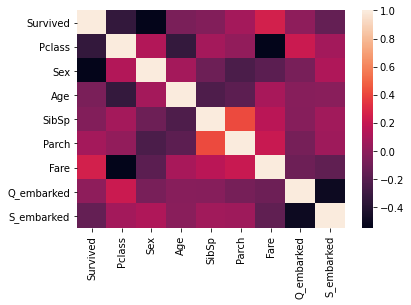

In [141]:
sns.heatmap(data_train.corr())